## LINEAR REGRESSION FROM SCRATCH



Assignment:

Linear Regression from Scratch

Implement Linear Regression using Mini-Batch Gradient Descent from scratch in Python.

- Create a class LinearRegression

Implement the following two functions in the above class:

1. fit(X, y): Trains the model using stochastic gradient descent, where X is a pandas DataFrame (m × n) and y is a pandas Series (m,)

2. predict(X): Returns predictions for input data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Dummy Data HSS.csv')

In [65]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_type
0,16.0,6.566231,2.907983,54.732757,1
1,13.0,9.237765,2.409567,46.677897,1
2,41.0,15.886446,2.913410,150.177829,1
3,83.0,30.020028,6.922304,298.246340,1
4,15.0,8.437408,1.405998,56.594181,2


In [4]:
df.shape

(4572, 5)

In [5]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
df.isna().sum()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


In [9]:
df.reset_index(drop = True, inplace = True)

In [11]:
df.shape   # initially it was 4572 so we dropped 26 data points

(4546, 5)

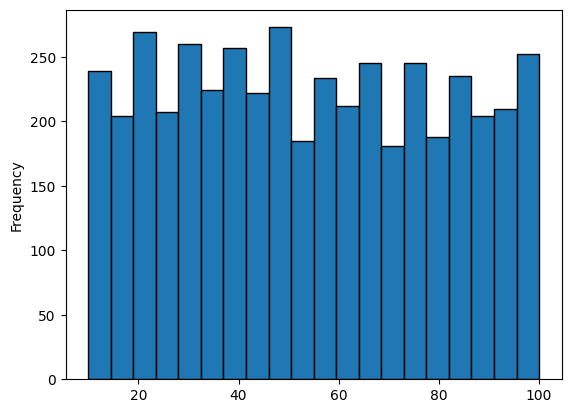

In [12]:
df['TV'].plot(
    kind = 'hist',
    bins = 20,
    edgecolor = 'black'
)
plt.show()

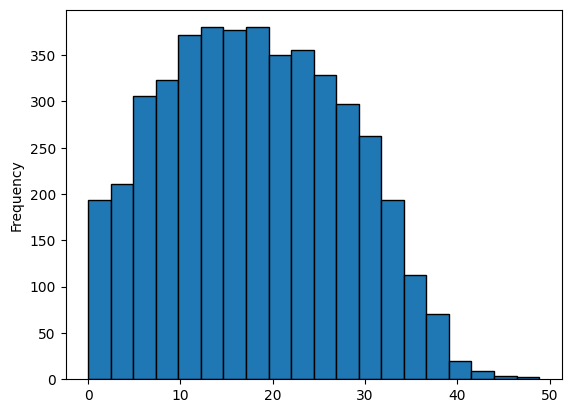

In [13]:
df['Radio'].plot(
    kind = 'hist',
    bins = 20,
    edgecolor = 'black'
)
plt.show()

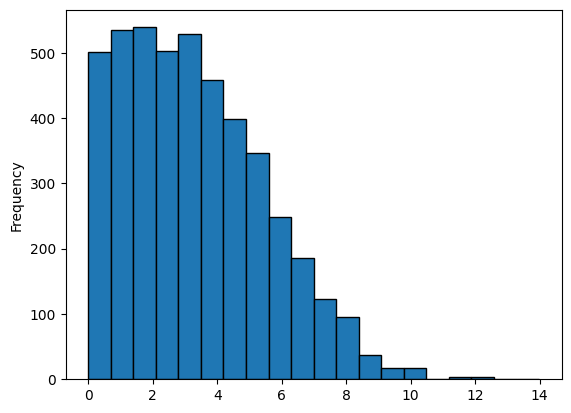

In [14]:
df['Social Media'].plot(
    kind = 'hist',
    bins = 20,
    edgecolor = 'black'
)
plt.show()

In [15]:
df['Influencer'].value_counts()

,count
Influencer,
Mega,1152
Micro,1148
Nano,1134
Macro,1112


In [16]:
df['Influencer_type'] = df['Influencer'].map({'Mega': 1,'Micro': 2, 'Nano': 3, 'Macro': 4})

In [17]:
df['Influencer_type'].value_counts()

,count
Influencer_type,
1,1152
2,1148
3,1134
4,1112


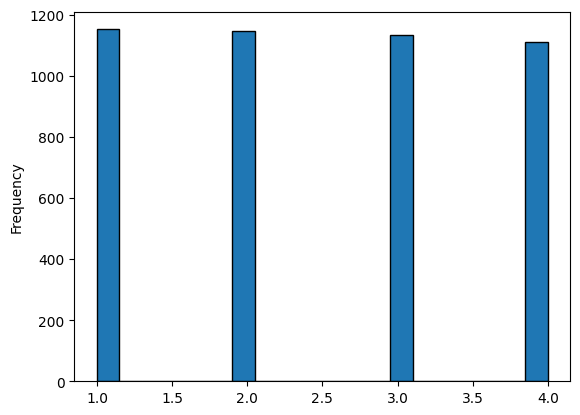

In [18]:
df['Influencer_type'].plot(
    kind = 'hist',
    bins = 20,
    edgecolor = 'black'
)
plt.show()

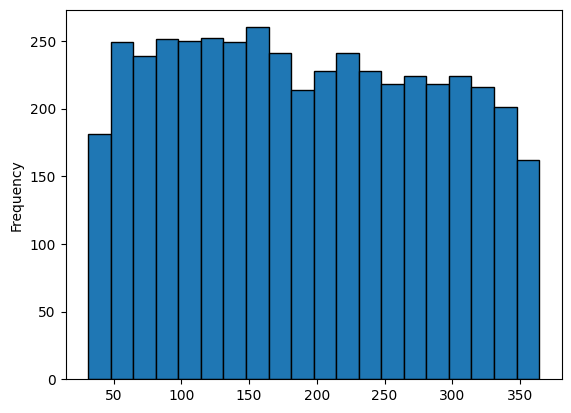

In [19]:
df['Sales'].plot(
    kind = 'hist',
    bins = 20,
    edgecolor = 'black'
)
plt.show()

In [20]:
df.drop(columns = ['Influencer'], inplace = True)

In [21]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_type
0,16.0,6.566231,2.907983,54.732757,1
1,13.0,9.237765,2.409567,46.677897,1
2,41.0,15.886446,2.913410,150.177829,1
3,83.0,30.020028,6.922304,298.246340,1
4,15.0,8.437408,1.405998,56.594181,2


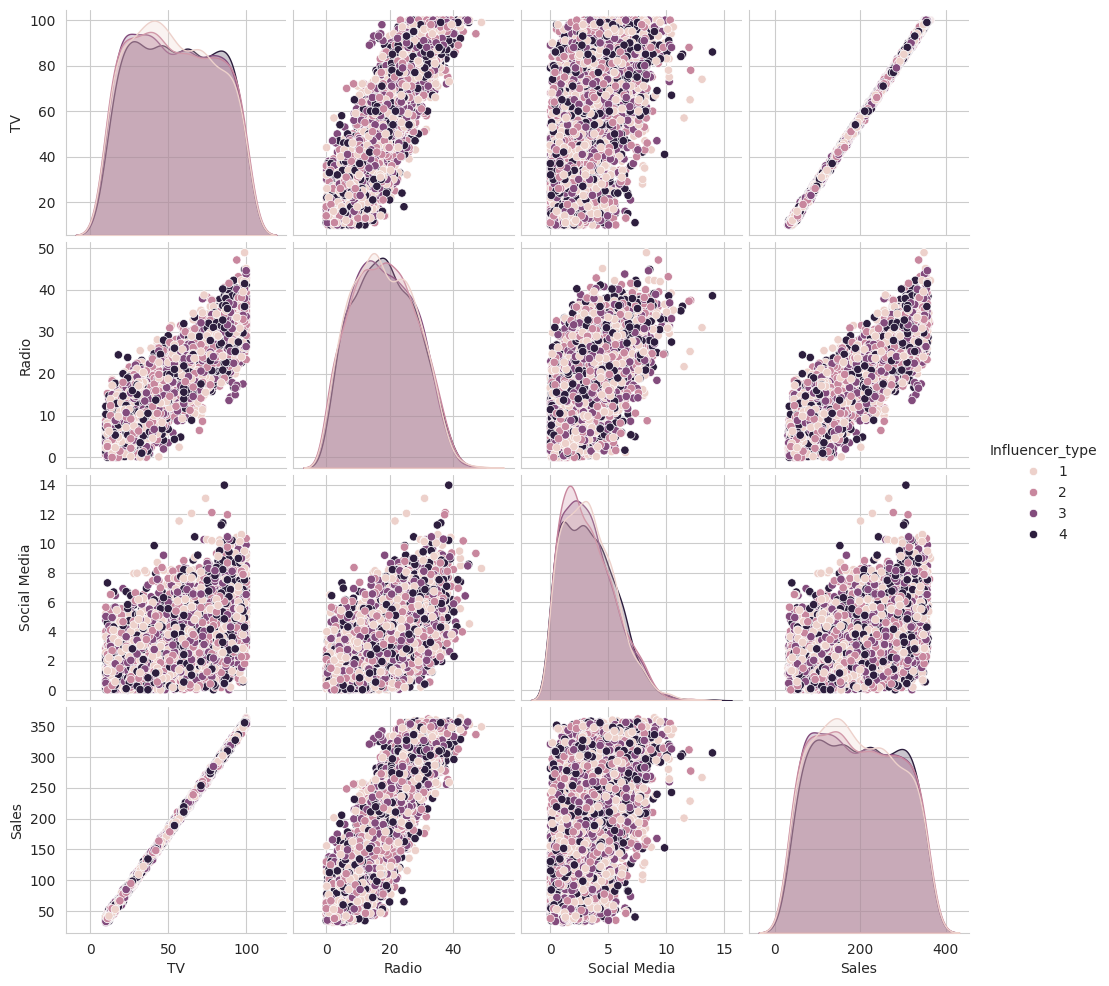

In [22]:
sns.set_style('whitegrid')
sns.pairplot(
    df,
    hue = 'Influencer_type'
)
plt.show()

<Axes: >

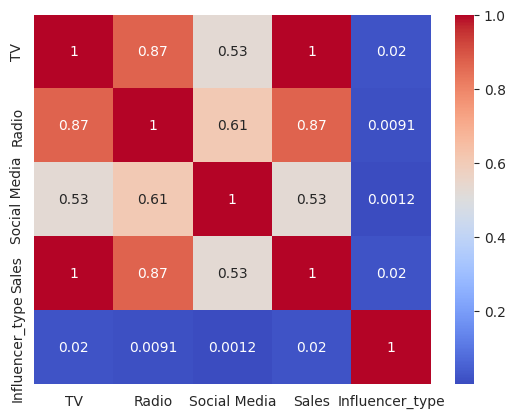

In [23]:
sns.heatmap(
    df.corr(),
    annot = True,
    cmap = 'coolwarm'
)

STANDARDIZATION


In [67]:
x0 = df['TV']
x1 = df['Radio']
x2 = df['Social Media']
x3 = df['Influencer_type']
y = df['Sales']

m0 = np.mean(x0)
m1 = np.mean(x1)
m2 = np.mean(x2)


sd0 = np.std(x0)
sd1 = np.std(x1)
sd2 = np.std(x2)


x0_new = (x0 - m0)/sd0
x1_new = (x1 - m1)/sd1
x2_new = (x2 - m2)/sd2


In [68]:
data_processed = {
    'TV': x0_new,
    'Radio': x1_new,
    'Social Media': x2_new,
    'Influencer_type': x3,
    'Sales': y
}

df_processed = pd.DataFrame(data_processed)

In [69]:
df_processed.head()

,TV,Radio,Social Media,Influencer_type,Sales
0,-1.458233,-1.199655,-0.187919,1,54.732757
1,-1.573167,-0.923162,-0.413343,1,46.677897
2,-0.500455,-0.235049,-0.185464,1,150.177829
3,1.108613,1.227722,1.627686,1,298.246340
4,-1.496545,-1.005995,-0.867239,2,56.594181


In [70]:
X = df_processed[['TV', 'Radio', 'Social Media', 'Influencer_type']]
y = df_processed['Sales']

In [71]:
print(X)
print(y)

            TV     Radio  Social Media  Influencer_type
0    -1.458233 -1.199655     -0.187919                1
1    -1.573167 -0.923162     -0.413343                1
2    -0.500455 -0.235049     -0.185464                1
3     1.108613  1.227722      1.627686                1
4    -1.496545 -1.005995     -0.867239                2
...        ...       ...           ...              ...
4541 -1.075122 -1.416362     -1.178820                2
4542  0.648879  0.253892      1.457297                3
4543 -0.385522  0.169996      0.801769                2
4544  0.648879 -0.064467     -0.625325                4
4545 -0.462144 -0.226744      0.779315                2

[4546 rows x 4 columns]
0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4541     94.685866
4542    249.101915
4543    163.631457
4544    253.610411
4545    148.202414
Name: Sales, Length: 4546, dtype: float64


In [72]:
num_rows = df_processed.shape[0]
num_columns = df_processed.shape[1]
print(num_rows)
print(num_columns)

4546
5


In [73]:
train_size = int(num_rows * 0.8)
test_size = int(num_rows * 0.2) + 1

print(train_size)
print(test_size)

3636
910


In [74]:
X_train = X[0:train_size]
y_train = y[0:train_size]
print(X_train)

            TV     Radio  Social Media  Influencer_type
0    -1.458233 -1.199655     -0.187919                1
1    -1.573167 -0.923162     -0.413343                1
2    -0.500455 -0.235049     -0.185464                1
3     1.108613  1.227722      1.627686                1
4    -1.496545 -1.005995     -0.867239                2
...        ...       ...           ...              ...
3631 -1.611478 -1.227301     -1.090596                2
3632  1.721591  1.734946      1.583714                3
3633 -0.270588 -0.542589     -0.675764                3
3634 -0.883566 -0.759149     -1.115217                4
3635  0.380701  0.432395     -1.306562                1

[3636 rows x 4 columns]


In [75]:
X_test = X[train_size:]
y_test = y[train_size:]
print(X_test)

            TV     Radio  Social Media  Influencer_type
3636  1.300168  0.769985      0.714486                2
3637  1.530035  0.318184      0.352008                1
3638 -1.573167 -0.640036     -1.446988                1
3639  1.530035  1.638986      0.980597                3
3640  0.265768  0.896887      1.023507                4
...        ...       ...           ...              ...
4541 -1.075122 -1.416362     -1.178820                2
4542  0.648879  0.253892      1.457297                3
4543 -0.385522  0.169996      0.801769                2
4544  0.648879 -0.064467     -0.625325                4
4545 -0.462144 -0.226744      0.779315                2

[910 rows x 4 columns]


In [76]:
X_train.shape

(3636, 4)

In [105]:
class LinearRegression:
  def __init__ (self,learning_rate, batch_size):
    m = [0]*(num_columns-1)
    b = 0
    self.m = m
    self.b = b
    self.learning_rate = learning_rate
    self.batch_size = batch_size

  def fit(self, X_train, y_train):
    grad_w = 1
    grad_b = 1
    x_dp = []
    for i in range (0, len(X_train)):
      y_pred = 0
      for j in range (num_columns-1):
        if (i%(self.batch_size) == 0):
          self.m[j] = self.m[j] - self.learning_rate * (grad_w/self.batch_size)
          self.b = self.b - self.learning_rate * (grad_b/self.batch_size)
          grad_w = 1
          grad_b = 1
        x = X_train.iloc[i, j]
        x_dp.append(x)
        y_pred += self.m[j]*x
      y_pred += self.b
      loss = (y_pred - y_train[i])**2
      grad_w += 2 * (y_train[i] - y_pred) * sum(x_dp)
      x_dp =[]
      grad_b += 2 * (y_train[i] - y_pred)

    return self.m, self.b

  def predict(self,X_test):
    y_pred_final = []
    y_pred = 0
    for i in range (0, len(X_test)):
      for j in range (num_columns-1):
        x = X_test.iloc[i, j]
        y_pred += self.m[j]*x
      y_pred += self.b
      y_pred_final.append(y_pred)
      y_pred = 0
    return y_pred_final

In [106]:
model_batch = LinearRegression(0.001, 32)

In [107]:
model_batch.fit(X_train, y_train)

([np.float64(-229.81910944224194),
  -0.0035625000000000027,
  -0.0035625000000000027,
  -0.0035625000000000027],
 np.float64(-48.792472714803154))

In [108]:
y_pred_batch = model_batch.predict(X_test)
print(y_pred_batch)

[np.float64(-347.60843291496906), np.float64(-400.4297579648419), np.float64(312.75520827616344), np.float64(-400.4438276690777), np.float64(-109.89206300436598), np.float64(-233.1577062316117), np.float64(-303.58522489258485), np.float64(339.17030716869976), np.float64(-312.39082676337296), np.float64(189.4821686956402), np.float64(-153.9043889469093), np.float64(-101.07082763092251), np.float64(39.79823735913038), np.float64(330.3622242910965), np.float64(92.63209384929968), np.float64(119.04015540835573), np.float64(-4.217223490357611), np.float64(-127.4892094373747), np.float64(198.28136930350493), np.float64(83.82361588492822), np.float64(154.25356701234472), np.float64(145.46457353625706), np.float64(303.9468525480121), np.float64(-250.7489248522707), np.float64(-180.32344215980052), np.float64(-347.6108475065938), np.float64(-391.6275990289155), np.float64(339.1682151981016), np.float64(-321.2007664297731), np.float64(-374.0234530826573), np.float64(-382.82936754002674), np.floa

In [109]:
mse_loss = 0
for i in range(0, len(y_pred_batch)):
  mse_loss += (y_pred_batch[i] - y_test.iloc[i])**2

print(mse_loss/len(y_pred_batch))

158802.3709719152
